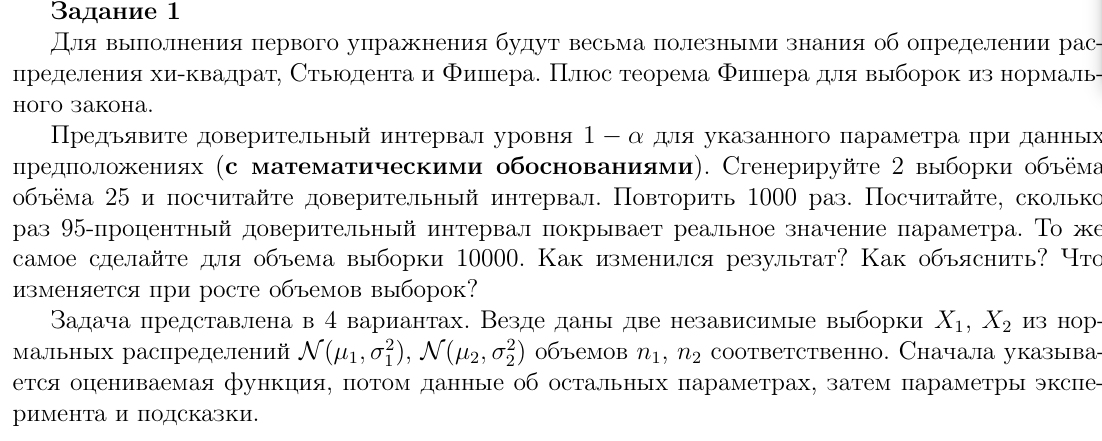

Построим доверительный интервал для $\tau = \mu_1 - \mu_2$:

$\bar X_1  = \frac{1}{n_1} \sum_{i=1}^{n_1} X_i^{(1)}, \bar X_2  = \frac{1}{n_2} \sum_{i=1}^{n_2} X_i^{(2)}  \\
\hat \tau = \bar X_1 - \bar X_2 \\
$


При этом распределены будут следующим образом(так как выборки независимы): \
$\bar X_1 \backsim 𝒩 (\mu_1,\frac{\sigma_1^2}{n_1}), \bar X_2 \backsim 𝒩 (\mu_2,\frac{\sigma_2^2}{n_2}) \\
\hat \tau = \bar X_1 - \bar X_2 \backsim  𝒩 (\mu_1-\mu_2, \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} ) =   𝒩 (\mu_1-\mu_2, \sigma^2)
 $

Стандартизируем функцию. Получим: \
$ 𝑍 = \frac{\hat \tau - \tau}{\sigma} \backsim 𝒩(0,1)  $ \
Воспользуемся же теперь свойствами нормального распределения для построения доверительного интервала:  
$ P(-q_{1-\frac{\alpha}{2}} ≤ \frac{\hat \tau - \tau}{\sigma} \le q_{1-\frac{\alpha}{2}} ) = 1 - \alpha $ \
Выразим из данного выражения $ \tau $:  \
$ P(\tau \in [\hat \tau -q_{1-\frac{\alpha}{2}} * \sigma; \hat \tau + q_{1-\frac{\alpha}{2}}  * \sigma])   $ - доверительный интервал для $\tau $

Перейдём к практической части, для начала заведём всё необходимое:

In [ ]:
import numpy as np
from scipy.stats import norm

mu1 = 2
mu2 = 1
sigma1_sq = 1
sigma2_sq = 0.5
tau_true = mu1 - mu2
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2) # это будет доверительный интервал для 0.95%
n_simulations = 1000

Теперь напишем функцию, в которой мы будем генерировать выборки, считать выборочные средние, стандартные ошибки и сам доверительный интервал, а также проверять покрытие:


In [ ]:
def run_experiment(n):
    coverage = 0
    total_width = 0

    for _ in range(n_simulations):
        sample1 = np.random.normal(loc=mu1, scale=np.sqrt(sigma1_sq), size=n)
        sample2 = np.random.normal(loc=mu2, scale=np.sqrt(sigma2_sq), size=n)

        x_bar1 = np.mean(sample1)
        x_bar2 = np.mean(sample2)
        diff = x_bar1 - x_bar2

        se = np.sqrt(sigma1_sq / n + sigma2_sq / n)

        lower = diff - z_critical * se
        upper = diff + z_critical * se
        width = upper - lower
        total_width += width

        if lower <= tau_true <= upper:
            coverage += 1

    coverage_rate = coverage / n_simulations
    avg_width = total_width / n_simulations
    return coverage_rate, avg_width

Теперь запустим на выборке объёма 25:

In [ ]:
rate_25, width_25 = run_experiment(25)
print(f"- Эмпирическое покрытие: {rate_25:.3f}, нужно 0.95")
print(f"- Средняя ширина интервала: {width_25:.3f}\n")

- Эмпирическое покрытие: 0.957, нужно 0.95
- Средняя ширина интервала: 0.960



На выборке объёма 10000:

In [ ]:
rate, width = run_experiment(10000)
print(f"- Эмпирическое покрытие: {rate:.3f}, нужно 0.95")
print(f"- Средняя ширина интервала: {width:.3f}\n")

- Эмпирическое покрытие: 0.959, нужно 0.95
- Средняя ширина интервала: 0.048



Как мы видим, при увеличении объёма выборки увеличивается точно эмпирического покрытия, а также снижается средняя ширина интервала, то есть более точным. Это происходит из-за закона больших чисел, который уменьшает стандартную ошибку с ростом n.


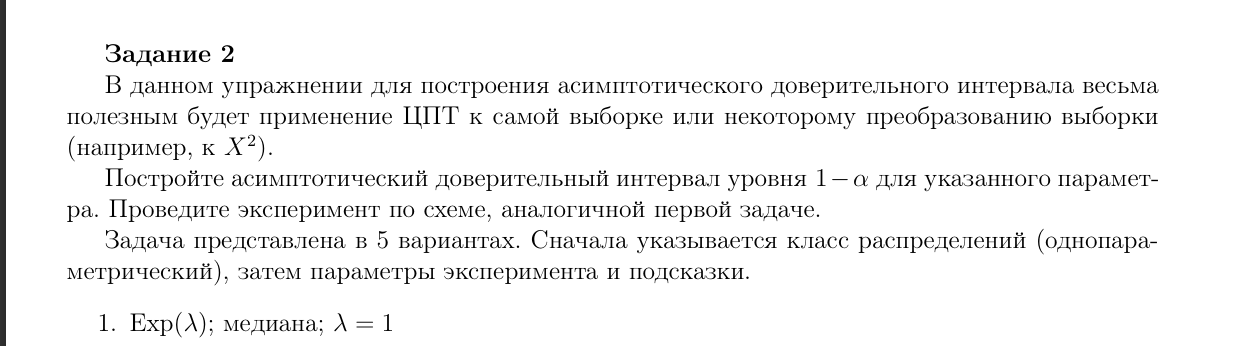

Запишем условие на медиану для этого распределения: \
$ m = \frac{\ln 2}{\lambda}$ \
Запишем теперь асимптотическую дисперсию выборочной медианы:  
$ f(m) = \lambda * e^{-\lambda m} = 1/2 $
Асимптотическая дисперсия оценки медианы $ \hat m $: \
$Var(\hat m) ≈ frac{1}{4n*[f(m)]^2} = \frac{1}{n}$ \
Стандартная ошибка: \
$\sigma = \frac{1}{\sqrt(n)}$ \
По теореме о асимптотической нормальности медианы получаем: \
$ \hat m
 ≈N(m, λ^2n) = N(m,n)$ \
 Тогда используя ЦПТ получаем: \
 $[
\hat m
 ±q_{
1−α/2
​}
 /
 \sqrt(n)
​
 ]$

Используя ту же идею что и раньше для функции:

In [ ]:
import numpy as np
from scipy.stats import norm


lambda_true = 1
m_true = np.log(2)
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)
n_simulations = 1000

def run_experiment(n):
    coverage = 0
    total_width = 0

    for _ in range(n_simulations):
        sample = np.random.exponential(scale=1/lambda_true, size=n)
        m_hat = np.median(sample)
        se = 1 / np.sqrt(n)
        lower = m_hat - z_critical * se
        upper = m_hat + z_critical * se

        if lower <= m_true <= upper:
            coverage += 1
        total_width += upper - lower

    coverage_rate = coverage / n_simulations
    avg_width = total_width / n_simulations
    return coverage_rate, avg_width

coverage_25, width_25 = run_experiment(25)
print(f"n=25: Покрытие = {coverage_25:.3f}, Ширина = {width_25:.3f}")

coverage_10000, width_10000 = run_experiment(10000)
print(f"n=10000: Покрытие = {coverage_10000:.3f}, Ширина = {width_10000:.3f}")

n=25: Покрытие = 0.942, Ширина = 0.784
n=10000: Покрытие = 0.951, Ширина = 0.039
